# 核密度估计Kernel Density Estimation(KDE)
在介绍核密度评估Kernel Density Estimation(KDE)之前，先介绍下密度估计的问题。由给定样本集合求解随机变量的分布密度函数问题是概率统计学的基本问题之一。解决这一问题的方法包括参数估计和非参数估计。

参数估计又可分为参数回归分析和参数判别分析。在参数回归分析中，人们假定数据分布符合某种特定的性态，如线性、可化线性或指数性态等，然后在目标函数族中寻找特定的解，即确定回归模型中的未知参数。在参数判别分析中，人们需要假定作为判别依据的、随机取值的数据样本在各个可能的类别中都服从特定的分布。经验和理论说明，参数模型的这种基本假定与实际的物理模型之间常常存在较大的差距，这些方法并非总能取得令人满意的结果。


由于上述缺陷，Rosenblatt和Parzen提出了非参数估计方法，即核密度估计方法。由于核密度估计方法不利用有关数据分布的先验知识，对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法，因而，在统计学理论和应用领域均受到高度的重视。

因此，一句话概括，核密度估计Kernel Density Estimation(KDE)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。

Kent 白話版:從 Sample Data 來預測其它未看到到的資料

# 參考資料
* http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
* http://www.dataivy.cn/blog/%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%AE%A1kernel-density-estimation_kde/

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [87]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


#----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

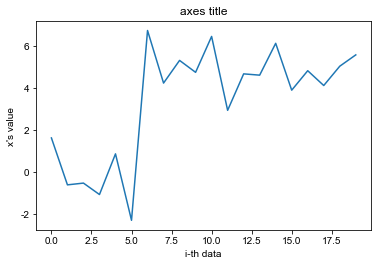

In [112]:
# 看一下 x 值的範圍洛在哪裡
fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('i-th data')
ax.set_ylabel("x's value ")

plt.plot(X)

Text(-3.5,0.31,'Histogram, bins shifted')

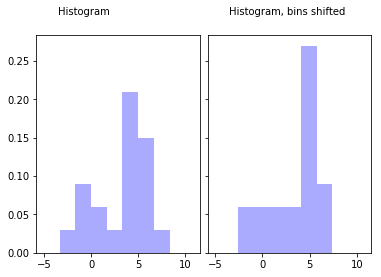

In [91]:
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0].hist(X[:, 0], bins=bins, fc='#AAAAFF', normed=True)
ax[0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[1].text(-3.5, 0.31, "Histogram, bins shifted")

Text(0.5,0,'x')

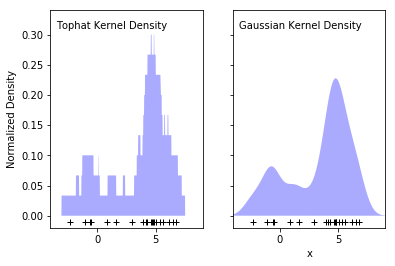

In [94]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)


# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

ax[0].set_ylabel('Normalized Density')

ax[1].set_xlabel('x')